# 1. Bài toán phân loại topic

## 1.1. Tại sao ta lại cần phân loại topic

Trong cuộc sống sẽ rất cần đến các bài toán phân loại topics. Chẳng hạn như người đọc báo có thể dễ dàng lựa chọn thể loại báo ưa thích thông qua topics mà nó được gán. Người mua sách có thể lựa chọn được những sách liên quan đến chủ đề mà mình quan tâm thông qua topics. Hoặc người đưa tin có thể tóm tắt nội dung của các mẩu tin thông qua topics. Tóm lại tác vụ phân loại topics giúp chúng ta đọc hiểu, lựa chọn và tìm kiếm những thông tin có nội dung xác định nhanh và chính xác hơn. Trong lớp những bài toán phân loại topics thì thuật toán LDA là một trong những lớp mô hình được ưa chuộng vì hiệu quả tính toán nhanh, đưa ra kết quả chính xác dựa trên lớp mô hình sinh (generative model). Kết quả của LDA trả ra bao gồm phân phối theo văn bản và phân phối theo mỗi từ. Trong đó phân phối theo văn bản là một tợp hợp phân phối hỗi hợp của một số lượng cố định các topics và mỗi từ sẽ biểu diễn mức độ đóng góp vào văn bản thông qua biểu diễn của nó theo topics. Để hiểu hơn về LDA là mô hình như thế nào và lịch sử hình thành phát triển của nó ra sao chúng ta cùng tìm hiểu quan bài viết này.

## 1.2. Các dạng mô hình tìm chủ đề.

Trước đây phương pháp tf-idf được sử dụng khá phổ biến để mã hóa văn bản thành véc tơ. Một tợp hợp các từ (words hoặc terms) được lựa chọn trước hay còn gọi là bag of word sao cho những từ này không phải là stop words và với mỗi một văn bản (document) ta sẽ đo lường tần suất xuất hiện của chúng. Những tần suất này sau đó sẽ được so sánh với tần suất văn bản xuất hiện từ trong toàn bộ bộ văn bản (corpus). Từ đó ta tính được chỉ số tf-idf của từng từ trong tập bag of word. 

![](https://cdn-images-1.medium.com/max/720/1*jNnpbGPxkjehlvTCXq9B8g.png)

**Hình 1:** Công thức tính tf-idf dựa trên tần suất xuất hiện của từ trong văn bản và nghịch đảo tần suất văn bản xuất hiện từ trên với tổng số lượng văn bản.

Chỉ số tf-idf sẽ giúp ta tìm được những từ có ý nghĩa quan trọng trong 1 corpus và loại bỏ những từ ít quan trọng và common words thông qua giá trị của tf-idf càng lớn đối với những từ quan trọng.

Các bạn có thể xem thêm tại [Kỹ thuật feature engineering - 2.1: Trích lọc đặc trưng cho văn bản](https://phamdinhkhanh.github.io/2019/01/07/Ky_thuat_feature_engineering.html).

Kết quả sau cùng ta thu được một ma trận document-word $\mathbf{X}$ sao cho mỗi cột của ma trận sẽ chứa các giá trị tf-idf đại diện cho một văn bản trong corpus và mỗi dòng đại diện cho một từ.

Do đó ta có thể coi tf-idf là một phương pháp giảm chiều dữ liệu. Trong khi tf-idf có một số đặc trưng rất tốt đặc biệt là trong xác định tợp hợp các từ có ảnh hưởng lớn đến phân biệt nội dung các văn bản. Nhưng phương pháp này vẫn bộc lộ những yếu điểm như số lượng chiều giảm thiểu là không đáng kể và cung cấp rất ít về những thông tin cấu thành bên trong của văn bản như các topic và nhân tố ẩn bên trong là gì? 

## 1.2.1. Model LSA.

Để khắc phục những hạn chế này các nhà nghiên cứu đã đề xuất 1 phương pháp là LSA (latent semantic analysis) dựa trên phép phân tích suy biến ma trận $\mathbf{X}$ để xác định một không gian tuyến tính con của tf-idf mà vẫn lưu giữ được hầu hết những biến động của ma trận $\mathbf{X}$. Chắc các bạn còn nhớ về phép phân tích suy biến của ma trận chứ? Nếu chưa nhớ có thể xem lại bài [phép phân tích suy biến](https://www.kaggle.com/phamdinhkhanh/singular-value-decomposition).

Gỉa sử ma trận biểu diễn mối quan hệ giữa document-word là $\mathbf{A}_{mn} \in \mathbb{R}^{m \times n}$.
Về cơ bản phép phân tích suy biến sẽ biến đổi ma trận gốc $\mathbf{A}$ thành tích của các ma trận suy biến trái $\mathbf{U}$, ma trận đường chéo $\mathbf{S}$ và ma trận suy biến phải $\mathbf{V}$ theo công thức:

$$\mathbf{A}_{mn} = \mathbf{U}_{mt}\mathbf{\Sigma}_{tt}\mathbf{V}_{nt}^\mathbf{T}$$

![](https://cdn-images-1.medium.com/max/720/1*DOvWt8JH8_fXETb2hiO_LA.png)

**Hình 2:** Phép phân tích suy biến.

Trong đó $t$ là tham số số lượng topics được lựa chọn. Khi đó:
* Ma trận $\mathbf{U} \in \mathbb{R}^{m \times t}$ là ma trận document-topic. 
* Ma trận $\mathbf{V} \in \mathbb{R}^{n \times t}$ là ma trận term-topic. 
* Mỗi dòng của $\mathbf{U}$ sẽ biểu diễn phân phối của văn bản và mỗi dòng của $\mathbf{V}$ là phân phối của mỗi từ theo $t$ topics ẩn.
* Các cột của $\mathbf{U}$ và $\mathbf{V}$ đại diện cho các topics.
* Để tìm ra 2 văn bản có giống nhau hoặc 2 từ giống nhau chúng ta sẽ tính tương quan của các véc tơ dòng tương ứng với các văn bản của ma trận $\mathbf{U}$ hoặc các véc tơ dòng tương ứng với từ của ma trận $\mathbf{V}$.

Phép phân tích này giảm được khá nhiều chiều đối với trường hợp bộ văn bản lớn. Tuy nhiên nó vẫn tồn tại những nhược điểm đó là:
1. Các tính toán hoàn toàn dựa trên phân tích ma trận.
2. Các topic được xác định dựa trên các phép chiếu tuyến tính nên mối quan hệ giữa topic-document và topic-term là tuyến tính.
3. Chi phí tinh toán của mô hình rất tốn kém nếu kích thước dữ liệu lớn.

## 1.2.2. Model pLSA

Thay vì sử dụng ma trận, mô hình probabilistic latent sementic analysis (pLSA) sẽ sử dụng phương pháp xác xuất. Đồ thị mô hình có dạng như sau:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Plsi_1.svg/450px-Plsi_1.svg.png)

Xét các quan sát dưới dạng đồng xuất hiện của các cặp $(w, d)$ của document-term, pLSA sẽ mô hình hóa xác suất đồng xuất hiện của mỗi cặp $(w, d)$ như một hỗn hợp của phân phối multinormial độc lập có điều kiện:

$$p(w, d) = \sum_{c} p(c)p(d|c)p(w|c) = p(d)\sum_{c}p(c|d)p(w|c)$$

* Như vậy xác suất đồng xuất hiện của một cặp document-term sẽ được xác định thông qua phân phối xác suất của topic theo các văn bản $p(c|d)$ và phân phối xác suất của các từ theo topic $p(w|c)$.

* $p(d), p(c|d), p(w|c)$ là các tham số của mô hình. $p(d)$ có thể được xác định trực tiếp từ bộ văn bản, $p(c|d)$ và $p(w|c)$ là các phân phối multinomial được training từ mô hình thông qua phương pháp **tối đa hóa kì vọng - EM** ([expectation maximization](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)). Không quá đi sâu vào phương pháp tối đa hóa kì vọng, một cách khái quát EM giúp tìm ra tham số hợp lý nhất cho mô hình dựa trên các nhân tố ẩn (ở đây là các topics ẩn) dựa trên tối ưu hóa hàm hợp lý tối đa.

* Bên cạnh đó xác suất đồng xuất hiện $p(w, d)$ cũng có thể được biểu diễn thông qua phân phối xác xuất của từ theo topic ($p(w|c)$) và của văn bản theo topic ($p(d|c)$). Trường hợp này sẽ tương tự như mô hình LSA. Khi đó $p(d|c)$ sẽ tương ứng với ma trận suy biến trái $\mathbf{U}$, $p(w|c)$ tương ứng với ma trận suy biến phải $\mathbf{V}$, $p(c)$ chính là ma trận đường chéo chính $\mathbf{\Sigma}$.

* Chúng ta có thể hình dung quá trình hồi qui pLSA như một quá trình sinh dựa trên một đồ thị. Bước đầu tiên của mô hình có thể xuất phát với topic hoặc văn bản. Nếu chúng ta bắt đầu với văn bản đầu tiên chúng ta tạo ra các phân phối của văn bản $p(d)$, sau đó sinh ra phân phối topic ngẫu nhiên $p(z|d)$, và tiếp theo tạo ra phân phối của các từ $p(w|z)$ dựa trên topic. Nếu bắt đầu bằng topic thì chúng ta sẽ sinh ra các topic ngẫu nhiên, tiếp theo là 2 quá trình đồng thời tạo ra văn bản và từ dựa trên topic. Cụ thể của quá trình này như bên dưới:

![](https://cdn-images-1.medium.com/max/720/1*V-_VXpEXXOT-SaE-Vll3KQ.jpeg)

**Hình 3:** Qúa trình sinh của model pLSA

Mặc dù dựa trên mô hình sinh xác xuất đồ thị nên có tính linh hoạt cao hơn so với LSA nhưng mô hình pLSA vẫn có những hạn chế đó là:

* Chúng ta không xác định được trước tham số phân phối xác xuất của văn bản $p(d)$.
* Số lượng tham số của mô hình tăng tuyến tính với số lượng văn bản. Do đó mô hình không hoạt động tốt với dữ liệu lớn.

Chính vì thế model LDA được phát triển dựa trên mô hình pLSA nhằm khắc phục những khuyết điểm trên. LDA về cơ bản cũng là một mô hình được phát triển dựa trên pLSA nhưng phân phối xác xuất của dựa trên hàm dirichlet nên nó được gọi là latent dirichlet analysis.






# 2. Kiến thức về phân phối.
Trước khi đi sâu vào lý thuyết của model LDA chúng ta sẽ cần nắm vững lý thuyết về xác xuất, đặc biệt là các dạng hàm phân phối xác xuất được sử dụng trong các mô hình sinh (generative model). Những kiến thức này rất quan trọng và được áp dụng rất nhiều trong các mô hình thuộc trường phái bayes mà chúng ta cần nghi nhớ.

## 2.1. Phân phối tiên nghiệm và hậu nghiệm

Phân phối hậu nghiệm là họ các phân phối mà tham số của nó đã biết trước dựa trên kinh nghiệm. Chẳng hạn như theo một cách nào đó chúng ta đã biết trước rằng khi tung đồng xu đồng chất thì khả năng thu được mặt sấp là $1/2$. Do đó khi thử nghiệm tung một đồng xu đồng chất mới mà ta chưa từng tung trước đây, ta cũng tin chắc rằng xác suất thu được dao động quanh giá trị $1/2$. Dựa trên các hiểu biết chung về suy luận phân phối (liên tục) cho một tham số $\theta$ được đưa ra bởi một tập dữ liệu $X$, theo định lý Bayes, phân phối hậu nghiệm bằng tích của hàm hợp lý $p(x|\theta)$ với hàm phân phối tiên nghiệm $p(\theta)$ chia cho xác xuất của dữ liệu $p(x)$.

$${\displaystyle {\begin{aligned}p(\theta|x)&={\frac {p(x|\theta )\,p(\theta )}{p(x)}}\\&={\frac {p(x|\theta )\,p(\theta )}{\int p(x|\theta ')\,p(\theta ')\,d\theta '}}\end{aligned}}}$$

Theo trường phái thông kê suy diễn bayesian thì một hàm phân phối hậu nghiệm (posterior distribution) $p(\theta|x)$ thuộc cùng một họ phân phối xác xuất với phân phối tiên nghiệm (prior distribution) $p(\theta)$ thì hàm phân phối tiên nghiệm và hậu nghiệm được gọi là phân phối liên hợp (conjugate distributions) và hàm tiên nghiệm được gọi là liên hợp tiên nghiệm (**conjugate prior**) của hàm hợp lý tối đa. Chẳng hạn như lớp các hàm phân phối gaussian sẽ liên hợp với chính nó. Tức là nếu hàm hợp lý tối đa là một gaussian, lựa chọn một hàm tiên nghiệm với tham số trung bình sẽ đảm bảo hàm hậu nghiệm cũng sẽ phân phối gaussian.

## 2.2. Phân phối poisson.
Phân phối poisson là một phân phối rời rạc. 
Nhắc lại một số phân phối rời rạc thông dụng.

* **Phân phối bernoulli** tính xác xuất để 1 biến cố xảy ra trong 1 lần thử có hàm phân phối xác xuất:

$${\displaystyle f_{p}(k):=\mathbf {P} (X=k)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}}
$$

* **Phân phối categorical** là trường hợp tổng quát khác của phẩn phối bernoulli cho $K$ trường hợp. Khi đó biểu diễn của phân phối là một véc tơ $\lambda = [\lambda_1, \lambda_2, \dots, \lambda_K]$ với $\lambda_i$ là các số không âm có tổng bằng 1. Khi đó xác xuất để 1 biến cố rơi vào nhóm $k$ chính là:

$$\mathbf{P}(X=k) = \lambda_k$$

* **Phân phối nhị thức** cho ta biết xác xuất để 1 biến cố kiện xảy ra với tần suất là $k$ khi thực hiện một số lượng phép thử $n$, $n \geq k$. Phân phối này là trường hợp tổng quát của phân phối bernoulli cho tần suất nhiều hơn 1 biến cố xảy ra và có hàm phân phối xác xuất là:

$$f_{p}(k) := \mathbf{P}(X=k)=\binom{k}{n}p^{k}(1-p)^{n-k}$$

Khác với 3 dạng phân phối rời rạc thông thường nêu trên, phân phối poison được áp dụng nhiều trong các trường hợp tính toán luồng chờ của một chuỗi phục vụ chẳng hạn như cửa hàng, thời gian đợi xe bus,.... bởi phân phối này tính toán **trung bình số lần xảy ra thành công của một sự kiện trong một khoảng thời gian nhất định**. Gía trị trung bình này kí hiệu là $\lambda$.

$$f(k;\lambda) := \mathbf{P}(X=k) = \frac{\lambda^{k}e^{-\lambda}}{k!}$$

với:
$k$ là số lần xuất hiện của sự kiện.

## 2.3. Phân phối beta
Beta distribution là một phân phối liên tục xác định dựa trên biến ngẫu nhiên $p \in [0, 1]$ nhằm mô tả sự biến động của tham số $p$ trong phân phối bernoulli. Phân phối beta được đặc tả bởi 2 tham số $\alpha, \beta$ không âm theo phương trình hàm mật độ xác xuất:
$$f(p; \alpha, \beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}p^{\alpha-1}(1-p)^{\beta-1}
$$

Trong đó hàm $\Gamma(.)$ được gọi là `gamma function` có mối liên hệ với giai thừa trong điều kiện tham số của nó là số nguyên.

$$\Gamma(n) = (n-1)!$$

Trong trường hợp tổng quát:

$$\Gamma(z) =  \int_0^{\infty} t^{z-1}e^{-t} dt$$
  

## 2.4. Phân phối Dirichlet
Phân phối dirichlet là trường hợp tổng quát của phân phối beta cho $K$ trường hợp. Phân phối sẽ được xây dựng dựa trên một phân phối categorical có véc tơ phân phối dạng $\lambda = [\lambda_1, \lambda_2, \dots, \lambda_K]$ sao cho tổng các phần tử bằng 1. 
Một véc tơ $\alpha = [\alpha_1, \alpha_2, \dots, \alpha_K]$ sẽ là các tham số đặc trưng tương ứng với mỗi phần tử của véc tơ $\lambda$.
Khi đó hàm mật độ xác xuất của véc tơ phân phối $\lambda$ sẽ có dạng:

$$f(\lambda; \alpha) = \frac{\Gamma(\sum_{i=1}^{K}\alpha_i)}{\prod_{i=1}^{K}\Gamma(\alpha_i)} \prod_{i=1}^{K}{\lambda_i^{\alpha_i-1}(1-\lambda_i)^{\alpha_i-1}}
$$

Hoặc chúng ta có thể viết gọn dưới dạng:

$$f(\lambda; \alpha) = \text{Dir}_{\lambda}(\alpha)$$

Trên thực thế phân phối Dirichlet chính là phân phối liên hợp của phân phối categorical và phân phối benourlli.

## 2.5. Phân phối Multinomial
Là một phân phối rời rạc và là trường hợp tổng quát của phân phối nhị thức khi nó tính xác suất của nhiều hơn 2 trường hợp. Đây là phân phối thường xuyên bắt gặp trong thực tế như tính xác suất lặp lại $x$ lần một mặt của xúc xắc 6 mặt nếu gieo nó $n$ lần. Hoặc trong 1 rổ có 10 bóng đèn trong đó có 4 bóng xanh va 5 bóng đỏ. Tính xác suất để lấy ngẫu nhiên 5 bóng thì thu được 3 bóng xanh và 2 bóng đỏ nếu không phân biệt thứ tự các bóng cùng màu. 

Bạn đọc đã hình dung ra phân phối multinomial rồi chứ? Tóm lại, đây là phân phối thực hiện $n$ phép thử độc lập và dẫn tới kết quả thành công là một trong số $k$ nhóm. Phân phối multinomial sẽ trả về xác suất của bất kì sự kết hợp nào của một số lần thành công ứng với các nhóm.

Trong trường hợp số nhóm $k=2$ và số phép thử $n=1$ chính là phân phối bernoulli. Khi $k=2$ và $n>1$ là phân phối nhị thức. Khi $k>2$ và $n=1$ ta thu được phân phối categorical.

Trong lĩnh vực xử lý ngôn ngữ tự nhiên, phân phối categorical và phân phối multinomial là tương đương nhau và được sử dụng như là phân phối multinomial.

Gỉa định rằng chúng ta một chiếc túi đựng $n$ quả bóng của $k$ màu sắc khác nhau. Ta sẽ thực hiện các phép thử lấy ngẫu nhiên các quả bóng từ túi sao cho sau mỗi lần tử các quả bóng được đặt trở lại túi. Kí hiệu biến $X_i$ là số lượng quả bóng lấy được từ nhóm màu thứ $i$, $x_i$ là số lượng bóng thực tế đã lấy được và xác xuất để lấy được 1 quả bóng màu $i$ là $p_i$. Khi đó hàm phân phối xác xuất của Multinomial có dạng:

$$f_p(x) := \mathbf{P}(X_1 = x_1, X_2 = x_2, \dots, X_k = X_k)={\begin{cases}\frac{n!}{x_1!x_2! \dots x_k!}p_1^{x_1}p_2^{x_2}\dots p_k^{x_k} &{\text{when }}\sum_{i=1}^{k}x_i=n,
\\[6pt]0&{\text{if other}}\end{cases}}$$



# 3. Model LDA (Latent Dirichlet Allocation)

Model LDA là lớp mô hình sinh (generative model) cho phép xác định một tợp hợp các chủ đề tưởng tượng (imaginary topics) mà mỗi topic sẽ được biểu diễn bởi tập hợp các từ. Mục tiêu của LDA là mapping toàn bộ các văn bản sang các topics tương ứng sao cho các từ trong mỗi một văn bản sẽ thể hiện những topic tưởng tượng ấy.

## 3.1. LDA giảm thiểu khối lượng tính toán

Gỉa định rằng chúng ta có 1000 từ có tần suất xuất hiện nhiều nhất trong văn bản và chúng ta có 1000 văn bản. Gỉa sử mỗi văn bản có 500 từ xuất hiện bên trong chúng. Làm thế nào để chúng ta có thể hiểu được các văn bản này thuộc về những nhóm nào? Một cách đơn giản là kết nối mỗi văn bản với một từ bằng 1 thread dựa trên sự xuất hiện của từ đó trong văn bản như sơ đồ bên dưới.

![Sơ đồ thread kết nối văn bản với từ vựng](https://miro.medium.com/max/1009/1*QQTk2TGyzhakGh0lZ9P03w.jpeg)

**Hình 4:** Sơ đồ kết nối văn bản với từ vựng.

Thông qua việc thống kê tần suất xuất hiện của các từ quan trọng trong một văn bản ta nhận thấy rằng có một số văn bản sẽ có một tợp hợp các từ gần như nhau. Do đó chúng sẽ liên quan với nhau về một chủ đề nào đó. Nhưng để làm như vậy chúng ta cần có `num_words*num_documents = 500*1000 = 500000` threads cho nó. Số lượng này tạo ra một chi phí tính toán rất lớn. Chính vì thế một cách đơn giản và tốn kém ít chi phí hơn đó là tìm cách giảm số lượng các kết nối giữa documents và words bằng cách tạo ra những topics trung gian nhóm các từ liên quan vào chung 1 nhóm và kết nối thông qua các nhóm này.

## 3.2. Làm thế nào để giảm chiều dữ liệu

Chúng ta có thể giải quyết vấn đề này bằng cách thêm một layer nhân tố ẩn có số units tương ứng với số lượng các topics mà chúng ta xác định sẽ có trong mô hình. Gỉa định chúng ta biết 10 topics có thể xuất hiện trong toàn bộ các văn bản. Những topics này có tính ẩn tức là chúng là tưởng tượng và không thể định nghĩa chính xác topics và mục đích chính khi sử dụng những topics này làm trung gian là giảm số lượng threads kết nối đến documents và từ đó giảm chi phí tính toán. Sau đó để tìm ra phân phối của văn bản theo các từ chứa trong nó, chúng ta sẽ kết nối các từ đến topic mà nó thuộc về và kết nối các topics đến các văn bản dựa trên loại topics mà mỗi văn bản chứa.

Nhưng vậy mỗi văn bản sẽ có khoảng 10 topics và mỗi topic sẽ có 500 từ. Số lượng threads lúc này sẽ là 20000 threads bao gồm 10000 threads kết nối giữa 1000 văn bản đến 10 topics và 10000 threads kết nối 10 topics đến 1000 từ vựng. Như chúng ta có thể hình dung ở hình dưới:

![Giảm số lượng kết nối thông qua các topics ẩn](https://miro.medium.com/max/1014/1*2uj6t3gNv76SpHrWf5-z-A.jpeg)

**Hình 5:** Sơ đồ kết nối văn bản tới các từ thông qua trung gian là các topics ẩn. Trong đó chúng ta giả định có 3 topics ẩn là ("Animals", "Sports", "Tech"). Trên thực tế chúng ta sẽ không có 3 topics này mà thay vào đó một phân phối của các từ chẳng hạn `(0.3*Cats,0.4*Dogs,0.2*Loyal, 0.1*Evil)` sẽ biểu diễn cho topic “Animals”. Mỗi topics sẽ là một biểu diễn phân phối của các từ mà nó thuộc về.

## 3.3. Lý thuyết về model LDA

**Các định nghĩa**

Một số định nghĩa mà chúng ta sẽ sử dụng trong mô hình LDA:
* Từ (word): Là đơn vị cơ bản nhất của LDA. Một từ được xác định bởi một chỉ số index trong từ điển có giá trị từ $\{1, 2, \dots, V\}$. Một từ thứ $i$ được biểu diễn dưới dạng one-hot véc tơ $w_i \in \mathbb{R}^V$ sao cho phần tử thứ $i$ của véc tơ bằng 1 và các phần tử còn lại bằng 0.

* Văn bản (document): là một tợp hợp của $N$ từ được kí hiệu bởi $\mathbf{w} = (w_1, w_2, \dots, w_N)$. Mỗi một véc tơ đại diện cho 1 từ trong câu.

* Bộ văn bản (corpus): Là tợp hợp của $M$ văn bản kí hiệu bởi $\mathcal{D} = \{\mathbf{w_1}, \mathbf{w_2}, \dots, \mathbf{w_M}\}$.

* Topic ẩn (latent topic): Là những chủ đề ẩn được xác định dựa trên phân phối của các từ và làm trung gian biểu diễn các văn bản theo topic. Số lượng topic được xác định trước và kí hiệu là $K$.

Chúng ta sẽ tìm ra một mô hình xác xuất cho hàm ước lượng hợp lý tối đa của bộ văn bản sẽ có xác xuất lớn nhất và các văn bản có nội dung gần nhau sẽ có mức độ tương quan lớn.

Latent Dirichlet Allocation (LDA) là mô hình thuộc lớp mô hình sinh xác suất (generative probabilistic model) của một bộ văn bản. Ý tưởng cơ bản của mô hình đó là mỗi một văn bản được biểu diễn bởi một hỗn hợp ngẫu nhiên của các topics ẩn, mỗi một topic được đặc tả bởi phân phối của nhóm các từ.

**Các tham số của mô hình**

* $\alpha$ là tham số của phân phối tiên nghiệm Dirichlet của topic đối với mỗi văn bản.

* $\beta$ là tham số của phân phối tiên nghiệm Dirichlet của topic đối với mỗi từ.

* $\theta_i$ là phân phối của **topic đối với văn bản** thứ $i$.

* $\phi_k$ là phân phối của **từ đối với topic** thứ $k$.

* $z_{ij}$ là topic của từ thứ $j$ đối với văn bản thứ $i$. Là một số nguyên có giá trị trong khoảng $[1, K]$.

* $w_{ij}$ là index trong vocabulary của từ thứ $i$ thuộc văn bản thứ $j$. Giá trị là một số nguyên trong khoảng $[1, V]$.

Trong mô hình LDA biến duy nhất mà chúng ta quan sát được là các từ $w_{ij}$ các biến còn lại đều là những nhân tố ẩn được sinh ra từ các phân phối xác định. Trong đó quan trọng nhất là một phân phối tiên nghiệm Dirichlet được sử dụng để mô hình hóa phân phối của các cặp topic-word. Phân phối của một topic qua các từ thường có skew lớn (phân phối dạng nhọn, đuôi mỏng) để xác xuất tập trung vào một nhóm nhỏ các từ. $K$ kí hiệu số lượng topic và $\phi_1, \dots, \phi_K$ là những véc tơ $V$ chiều ($V$ là kích thước của vocabulary) lưu các tham số phân phối Dirichlet của các topic theo từ.

Ta cũng có thể coi rằng $\mathbf{\theta}$ và $\mathbf{\phi}$ tương tự như những ma trận được tạo ra từ phép phân tích suy biến từ ma trận document-word ở thuật toán LSA. Theo đó mỗi dòng của $\mathbf{\theta}$ tương ứng với văn bản và mỗi cột tương ứng với topic; và $\mathbf{\phi}$ bao gồm các dòng tương ứng topic và các cột tương ứng với các từ.

**Qúa trình sinh**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Smoothed_LDA.png/377px-Smoothed_LDA.png)

**Hình 4:** Đồ thị của qúa trình sinh trong LDA. Những hình chữ nhật thể hiện quá trình lặp lại. Như vậy ta có thể thấy có 2 quá trình lặp lại liên tục trong LDA là quá trình lựa chọn topic và quá trình lựa chọn từ. Các tham số được khởi tạo tiến trình ban đầu là $\alpha$ và $\beta$. Từ đó tính toán được phân phối hỗn hợp của topic $\theta$ và phân phối của từ theo topic $\mathbf{w}$

Để suy luận ra các topic trong corpus, chúng ta sẽ tạo ra một quá trình sinh tưởng tượng mà khi đó các văn bản được tạo ra theo một cơ chế có thể suy luận và đảo ngược tiến trình đó. Tiến trình sinh như sau:

Phân phối xác suất của văn bản được tạo ra dưới dạng trộn lẫn ngẫu nhiên các topics, trong đó mỗi topic được xác lập bởi phân phối trên toàn bộ các từ. LDA giả định một tiến trình sinh cho bộ văn bản $\mathcal{D}$ bao gồm $M$ văn bản như sau:

1. Với mỗi một văn bản lựa chọn độ dài văn bản $N \sim \text{Poisson}(\xi)$.
2. Lựa chọn ma trận $\mathbf{\theta} \sim \text{Dir}(\alpha)$. Sao cho tham số $\theta_i$ chính là phân phối topic của văn bản thứ $i$. Tham số $\alpha$ thường là một véc tơ thưa $k$ chiều với đa số các thành phần bằng 0. Mỗi chiều của $\alpha$ đặc trưng cho 1 topic.
3. Lựa chọn $\mathbf{\phi} \sim \text{Dir}(\beta)$ đại diện cho phân phối của từ theo topic. Tương tự như $\alpha$, $\beta$ cũng là một véc tơ thưa $k$ chiều mà mỗi chiều của nó đặc trưng cho 1 topic. Các tham số của phân phối được lựa chọn là véc tơ thưa nhằm mục đích để mỗi một topic chỉ được giải thích bởi một nhóm nhỏ các từ thuộc về topic đó.
4. Đối với mỗi một từ $w_{ij}$ thuộc văn bản thứ $i$ và vị trí thứ $j$ trong văn bản:

  (a) Lựa chọn một phân phối topic $z_{i,j} \sim \text{Multinomial}(\theta_i)$. Trong đó $z_{i,j}$ là một số nguyên nằm trong khoảng $[1, K]$ xác định topic của toàn bộ các từ trong các văn bản.

  (b) Lựa chọn một từ $w_{i,j} \sim \text{Multinomial}(\phi_{i,j})$. Trong đó $w_{i, j}$ là các số nguyên trong khoảng $[1, V]$ xác định từ $w$ thứ $j$ trong văn bản $\mathbf{w}_i$.

Lưu ý rằng multinormial ở đây là những multinomial với 1 phép thử duy nhất nên nó tương đương với phân phối categorical.




Việc đầu tiên là chúng ta giả định số lượng topics ẩn là đã biết và bằng $k$, và do đó $k$ cũng sẽ qui định số chiều của phân phối Dirichlet. Thứ 2, chúng xác suất của từ được tham số hóa bằng một ma trận $\beta \in \mathbb{R}^{K \times V}$ với mỗi phần tử $\beta_{ij}$ đặc trưng cho phân phối xác suất của từ thứ $j$ cho chủ đề i hay $\beta_{ij} = p(w_{j}=1|z_{i}=1)$. Sau đó chúng ta sẽ cố định các tham số này. 

Khi đó ta sẽ tính được hàm mật độ xác suất của các topics đối với mỗi văn bản khi đã biết tham số $\alpha$ theo phân phối dirichlet:

$$f(\theta; \alpha) = \frac{\Gamma(\sum_{i=1}^{K}\alpha_i)}{\prod_{i=1}^{K}\Gamma(\alpha_i)} \prod_{i=1}^{K}{\theta_i^{\alpha_i-1}}
$$

Khi đó phân phối xác xuất chung của hỗn hợp topic $\theta$ với tập $N$ topic $\mathbf{z}$ và tập $N$ từ $\mathbf{w}$ tại các $\alpha, \beta$ đã biết chính là:

$$p(\theta, \mathbf{z}, \mathbf{w}|\alpha, \beta) = p(\theta|\alpha)\prod_{i=1}^N p(z_n|\theta)p(w_n|z_n,\beta)$$

Thành phần $p(\theta|\alpha)$ chính là phân phối xác suất hỗn hợp topic tương ứng với văn bản khi đã biết trước tham số phân phối Dirichlet $\alpha$. Vế còn lại $\prod_{i=1}^N p(z_n|\theta)p(w_n|z_n,\beta)$ chính là phân phối xác suất khi đã biết trước phân phối hỗn hợp topic $\theta$ và tham số phân phối Dirichlet $\beta$. Công thức này khá khó hiểu đối với những bạn chưa làm quen với lý thuyết về tính toán xác suất dựa trên [chuỗi markov](https://en.wikipedia.org/wiki/Markov_chain). Nhưng hãy tạm chấp nhận nó nếu quá khó hiểu.

Nếu lấy xác suất biên của một văn bản bằng cách tích phân theo $\theta$ và lấy tổng toàn bộ các $z$ ta sẽ được:

$$p(\mathbf{w}|\alpha, \beta) = \int p(\theta|\alpha)\prod_{i=1}^N \sum_{z_n} p(z_n|\theta)p(w_n|z_n,\beta) d\theta$$

Nếu bạn đọc đã quên xác suất biên xin nhắc lại: xác suất biên theo một chiều chính là xác suất được tính dựa trên tổng (nếu rời rạc) hoặc tích phân (nếu liên tục) các phân phối xác suất chung nếu thay đổi các chiều còn lại. Để nắm vững kiến thức về xác suất biên bạn đọc có thể đọc [bài ôn tập xác suất](https://machinelearningcoban.com/2017/07/09/prob/) được tổng hợp rất chuẩn mực và chi tiết tại blog machine learning cơ bản.

Và cuối cùng chúng ta sẽ tính được xác suất của toàn bộ văn bản dựa trên xác suất biên từ mỗi văn bản.

$$p(\mathcal{D}|\alpha, \beta) = \prod_{d=1}^{M} \int p(\theta_d|\alpha)\prod_{i=1}^N \sum_{z_n} p(z_n|\theta)p(w_n|z_n,\beta) d\theta_d$$

Từ phương trình xác suất trên toàn bộ văn bản, áp dụng phương pháp EM sẽ ước lượng được các tham số $\alpha, \beta$ và từ đó tính ra $\theta, \mathbf{z}, \mathbf{\phi},\mathbf{w}$ tôi sẽ không trình bày cụ thể ở đây vì quá dài và phức tạp. Bạn đọc có thể tham khảo mục [lda model - Mục 5.3](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf).


# 4. Ứng dụng của gensim trong bài toán LDA

Hiện tại gensim đã hỗ trợ xây dựng mô hình LDA khá đơn giản. Và thuận tiện. Để xây dựng một model LDA chúng ta sẽ trải qua các bước sau:

* Xây dựng từ điển cho mô hình.
* Mã hóa bộ văn bản bằng cách mapping văn bản với từ điển.
* Xác định số lượng topics ẩn cần tạo.
* Huấn luyện mô hình.

Có 2 phương pháp chính để thực hiện LDA đó là LDAMulticore hoặc LDAModel khác nhau ở chỗ LDAMulticore sẽ thực hiện các tính toán song song trên CPU với nhiều threads, trái lại LDAModel chỉ chạy trên single-thread nhưng có ưu điểm là ít khả năng gặp lỗi.

Quá trình huấn luyện dữ liệu sẽ được truyền vào model theo batch nên mô hình có thể huấn luyện được cho những bộ dữ liệu kích thước lớn hơn nhiều so với RAM.

Số core càng nhiều thời gian xử lý càng giảm cụ thể xem [bảng so sánh tốc độ xử lý khi thay đổi số lượng cores](https://radimrehurek.com/gensim/models/ldamulticore.html).

## 4.1. Dữ liệu.

Tiếp theo chúng ta sẽ thực hành mô hình LDA thông qua ví dụ về phân loại chủ đề dựa trên comment. Dữ liệu được sử dụng là [20-newgroups dataset](https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json). Dữ liệu bao gồm 11k các posts liên quan đến 20 chủ đề khác nhau đã được gán nhãn. Tuy nhiên chúng ta giả định là chưa biết nhãn của các post này và nhiệm vụ là sẽ là tìm ra các chủ đề của các comments thuộc về và các phân phối hỗn hợp của các văn bản theo topic và của topic theo mỗi từ. 

Trước tiên chúng ta sẽ đọc và khảo sát dữ liệu.



In [14]:
# Import Dataset
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'rec.motorcycles' 'misc.forsale'
 'comp.os.ms-windows.misc' 'alt.atheism' 'comp.graphics'
 'rec.sport.baseball' 'rec.sport.hockey' 'sci.electronics' 'sci.space'
 'talk.politics.misc' 'sci.med' 'talk.politics.mideast'
 'soc.religion.christian' 'comp.windows.x' 'comp.sys.ibm.pc.hardware'
 'talk.politics.guns' 'talk.religion.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles
100,From: tchen@magnus.acs.ohio-state.edu (Tsung-K...,6,misc.forsale
1000,From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\n...,2,comp.os.ms-windows.misc


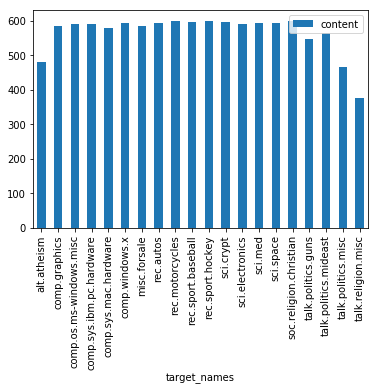

In [15]:
# Visualization số lượng các topics

df[['target_names', 'content']].groupby(['target_names']).count().plot(kind='bar')

Như vậy có 20 nhóm, mỗi nhóm có số lượng các posts trong khoảng từ 400-600. phân về các chủ đề như: auto, mobile, medicine,....

## 4.2. Tiền xử lý dữ liệu.

Gensim hỗ trợ tiền xử lý dữ liệu khá tiện ích thông qua hàm `simple_preprocess()`. Để remove dấu câu ta đặt giá trị cho tham số `deacc = True`.

In [16]:
import gensim
data = list(df['content'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'lerxst', 'wam', 'umd', 'edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]

## 4.3. Tạo ra các bigram và trigram cho mô hình.

Mô hình LDA sẽ sử dụng đầu vào là ma trận đồng xuất hiện của các từ. Để tính toán được tần suất đồng xuất hiện trên những ma trận này chúng ta sẽ tạo ra các bigram (2 từ) và trigram (3 từ) là cụm các từ liên tiếp nhau. Để xây dựng các bigram và trigram có thể sử dụng class Phrases của gensim

In [17]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['from', 'lerxst', 'wam_umd', 'edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd', 'edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


`min_count` chính là tần suất nhỏ nhất để một từ được lựa chọn đưa vào gram. ngưỡng threshold được thiết lập để 

Tiếp theo chúng ta sẽ loại bỏ các từ stopwords và chỉ lọc ra các từ vựng là các từ có tag từ loại là ['NOUN', 'ADJ', 'VERB', 'ADV']. Từ stopwords đã được tích hợp sẵn trong package nltk cho tiếng anh.

In [18]:
import nltk
nltk.download('stopwords')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Gọi các hàm trên để remove stopwords.

In [19]:
from gensim.utils import simple_preprocess
import spacy

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['lerxst', 'thing', 'car', 'nntp_poste', 'host', 'umd', 'organization', 'university', 'maryland_college', 'park', 'line', 'wonder', 'anyone', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'front_bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


## 4.4. Tạo ra từ điển và bộ văn bản

Từ điển (dictionary) và bộ văn bản (corpus) là 2 input chính cho model LDA. Sử dụng package gensim để tạo chúng như sau:

In [20]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)]]


Sau khi xử lý ta đã thu được 1 corpus là list các cặp (index, frequency) mã hóa các văn bản về index được qui định trong dictionary kèm theo tần suất xuất hiện của chúng trong văn bản. Để convert ngược lại từ index sang từ vựng ta sử dụng dictionary là id2word như sau.

In [21]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('addition', 1),
  ('anyone', 2),
  ('body', 1),
  ('bricklin', 1),
  ('bring', 1),
  ('call', 1),
  ('car', 5),
  ('could', 1),
  ('day', 1),
  ('door', 2),
  ('early', 1),
  ('engine', 1),
  ('enlighten', 1),
  ('front_bumper', 1),
  ('funky', 1),
  ('history', 1),
  ('host', 1),
  ('info', 1),
  ('know', 1),
  ('late', 1),
  ('lerxst', 2),
  ('line', 1),
  ('look', 2),
  ('mail', 1),
  ('make', 1),
  ('maryland_college', 1),
  ('model', 1),
  ('name', 1),
  ('neighborhood', 1),
  ('nntp_poste', 1),
  ('organization', 1),
  ('park', 1),
  ('production', 1),
  ('really', 1),
  ('rest', 1),
  ('see', 1),
  ('separate', 1),
  ('small', 1),
  ('specs', 1),
  ('sport', 1),
  ('tellme', 1),
  ('thank', 1),
  ('thing', 1),
  ('umd', 1),
  ('university', 1),
  ('wonder', 1),
  ('year', 1)]]

## 4.5 Xây dựng mô hình LDA.

Tham số chính được qui định trong mô hình LDA chính là số lượng topics (num_topics), chunksize: Số lượng văn bản được đưa vào mỗi batch huấn luyện. passes là số lượt epochs huấn luyện.

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

Sau khi huấn luyện xong mô hình chúng ta có thể save vào folder để lần sau sử dụng lại.

In [0]:
lda.save("your_folder/model_lda_100.model")

Và load lại model từ folder

In [0]:
# Load model
from gensim.models.ldamodel import LdaModel
lda = LdaModel.load("your_folder/model_lda_100.model")

## 4.6. Các topic thu được sau huấn luyện.
Sau khi huấn luyện xong model LDA ta có thể tìm ra phân phối của các văn bản theo topics và biểu diễn topics theo phân phối của các từ.

Bạn có thể tìm ra 10 từ vựng quan trọng nhất ở mỗi topics kèm theo trọng số phân phối của chúng.

In [0]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"sale" + 0.011*"contact" + 0.009*"head" + 0.009*"sell" + 0.008*"guy" '
  '+ 0.007*"back" + 0.006*"notice" + 0.006*"old" + 0.006*"food" + 0.006*"go"'),
 (1,
  '0.019*"information" + 0.017*"file" + 0.015*"program" + 0.015*"include" + '
  '0.013*"system" + 0.013*"also" + 0.013*"available" + 0.011*"software" + '
  '0.011*"standard" + 0.010*"new"'),
 (2,
  '0.014*"would" + 0.011*"say" + 0.011*"believe" + 0.011*"god" + 0.010*"may" + '
  '0.009*"think" + 0.009*"make" + 0.009*"mean" + 0.008*"people" + '
  '0.008*"point"'),
 (3,
  '0.025*"israel" + 0.017*"israeli" + 0.015*"mcgill" + 0.012*"arab" + '
  '0.011*"paper" + 0.011*"center" + 0.008*"wing" + 0.008*"neutral" + '
  '0.008*"gay" + 0.007*"detroit"'),
 (4,
  '0.014*"pitt" + 0.014*"rise" + 0.009*"obvious" + 0.008*"doctor" + '
  '0.008*"effect" + 0.008*"medical" + 0.007*"geb_cs" + 0.006*"disease" + '
  '0.006*"traffic" + 0.006*"medicine"'),
 (5,
  '0.033*"window" + 0.029*"card" + 0.022*"drive" + 0.015*"problem" + '
  '0.012*"colo

Đối với topic 0 ta thấy biểu diễn của chúng là: **'0.017*"sale" + 0.011*"contact" + 0.009*"head" + 0.009*"sell" + 0.008*"guy" '
  '+ 0.007*"back" + 0.006*"notice" + 0.006*"old" + 0.006*"food" + 0.006*"go"'** có nghĩa rằng có 10 từ vựng quan trọng nhất đóng góp vào topic này bao gồm: `'sale', 'contact', 'head', 'sell', 'guy', 'back', 'notice', 'old', 'food', 'go'`. Dựa vào cảm quan ta có thể biết được rằng topic này liên quan đến `sale`.
  


## 4.7. Tính chỉ số perplexity và coherence score của mô hình.
Chỉ số perplexity và coherence score cho là những chỉ số cho ta biết chất lượng của mô hình là tốt hay xấu. Nó còn được dùng trong tìm kiếm số lượng topics nào là phù hợp với bộ dữ liệu. Perplexity được xây dựng dựa trên logarit của hàm hợp lý tối đa (MLE) nên perplexity càng thấp thì chất lượng của model càng tốt. Trái lại Coherence score của mô hình càng cao thì mô hình sẽ càng tốt.

In [24]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.999125276695267

Coherence Score:  0.4963068962773461


In [0]:
!pip install pyLDAvis

In [0]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

## 4.8. Tìm ra topics chính của document.
Như ta đã biết các topics trong LDA là những topics ẩn, vậy chúng ta có cách nào để xác định một cách tương đôi topic chính của các văn bản này không? Câu trả lời là có dựa trên phân phối của topics theo các từ ta có thể tìm ra được từ nào là quan trọng nhất đối với mỗi topic và có khả năng topic sẽ liên quan đến từ này nhiều nhất nên gán cho topic ẩn một nghĩa tương đối chính là từ.

Bên dưới là hàm `format_topics_sentences()` giúp ta tổng hợp các topics trên mỗi văn bản.

In [41]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,16.0,0.4017,"line, com, organization, write, article, unive...",From: lerxst@wam.umd.edu (where's my thing)\nS...
1,1,1.0,0.4314,"information, file, program, include, system, a...",From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,2,11.0,0.2963,"ax, oil, motor, shop, brown, qq, qax, tire, va...",From: irwin@cmptrc.lonestar.org (Irwin Arnstei...
3,3,13.0,0.2989,"max, graphic, cwru, text, case_western, reserv...",From: tchen@magnus.acs.ohio-state.edu (Tsung-K...
4,4,5.0,0.2679,"window, card, drive, problem, color, run, use,...",From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\n...
5,5,16.0,0.3842,"line, com, organization, write, article, unive...",From: a207706@moe.dseg.ti.com (Robert Loper)\n...
6,6,16.0,0.3174,"line, com, organization, write, article, unive...",From: kimman@magnus.acs.ohio-state.edu (Kim Ri...
7,7,1.0,0.4025,"information, file, program, include, system, a...",From: kwilson@casbah.acns.nwu.edu (Kirtley Wil...
8,8,16.0,0.5431,"line, com, organization, write, article, unive...",Subject: Re: Don't more innocents die without ...
9,9,2.0,0.3431,"would, say, believe, god, may, think, make, me...",From: livesey@solntze.wpd.sgi.com (Jon Livesey...


Topic model là một trong những lớp mô hình có nhiều ứng dụng để giải quyết các vấn đề trong cuộc sống. Thông qua bài viết này bạn đọc đã nắm được:

* Các dạng mô hình topic: LSA, pLSA và LDA.
* graph model và các phân phối xác suất mà thuật toán LDA sử dụng.
* Quá trình sinh xác suất của mô hình LDA.
* Sử dụng gensim package để huấn luyện model LDA và tìm ra main topic cho các văn bản.

Dù đã cố gắng nhưng bài viết có thể còn nhiều mặt hạn chế. Chính vì thế tôi hi vọng nhận được phản hồi và đóng góp từ bạn đọc.

# 5. Tài liệu tham khảo

Để viết ra bài viết này tôi đã sử dụng rất nhiều các nguồn tài liệu tham khảo sau đây:

1. [Ôn tập xác suất - Machine learning cơ bản](https://machinelearningcoban.com/2017/07/09/prob/).

2. [Mô hình LDA - standford](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf).

3. [Gensim topic model - machinelearningplus blog](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/) 